# Baby Names

This dataset contains information on how many babies were born with each name. Both the raw number and proportion of births for the year are included.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-03-22/babynames.csv'
df = pd.read_csv(url)
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


- What were the 10 most popular names the year you were born?
- What year was your name the most popular?
- Where does your name rank for the year that you were born?
- Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
- Visualize your name's popularity over time.

In [25]:
# 10 most popular names year I was born (1992)
df[['name', 'n', 'prop', 'year']][df.year == 1992].sort_values('n').tail(10)

,name,n,prop,year
1135047,Tyler,28793,0.013720,1992
1135046,Daniel,29146,0.013888,1992
1135045,Brandon,29620,0.014114,1992
1135044,Andrew,30535,0.014550,1992
1135043,Joshua,36216,0.017257,1992
1135042,Matthew,37736,0.017981,1992
1119430,Jessica,38354,0.019136,1992
1119429,Ashley,38452,0.019185,1992
1135041,Christopher,42461,0.020233,1992
1135040,Michael,54386,0.025915,1992


In [28]:
# What year was my name the most popular
df[df.name == 'Brandyn'].sort_values('n', ascending=False)
# 1992. woah.
df[df.name == 'Brandyn'].groupby('year').n.sum().sort_values().tail(10)

year
1989    173
1997    181
1999    182
1998    200
1996    202
1991    207
1995    227
1994    232
1993    240
1992    269
Name: n, dtype: int64

In [32]:
# How does my name rank for the year I was born
year_1992 = df[df.year == 1992].copy()
year_1992['rank'] = year_1992.n.rank(ascending=False)
year_1992[year_1992.name == 'Brandyn']

,year,sex,name,n,prop,rank
1127571,1992,F,Brandyn,10,0.000005,13844.0
1135679,1992,M,Brandyn,259,0.000123,1426.0


In [15]:
# Does your name increase or decrease in popularity compared to the year after the year you were born? 
# The year before? What about 5 years before/after?
B_year = df[df.name == 'Brandyn'].sort_values('year', ascending = False)

In [18]:
B_year[B_year.year.between(1987, 1997)]

,year,sex,name,n,prop
1266306,1997,M,Brandyn,175,0.000088
1261606,1997,F,Brandyn,6,0.000003
1233622,1996,F,Brandyn,7,0.000004
1239544,1996,M,Brandyn,195,0.000097
1213296,1995,M,Brandyn,216,0.000107
1204393,1995,F,Brandyn,11,0.000006
1187253,1994,M,Brandyn,232,0.000114
1161327,1993,M,Brandyn,231,0.000112
1153662,1993,F,Brandyn,9,0.000005
1135679,1992,M,Brandyn,259,0.000123


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'n'}>],
       [<AxesSubplot:title={'center':'prop'}>, <AxesSubplot:>]],
      dtype=object)

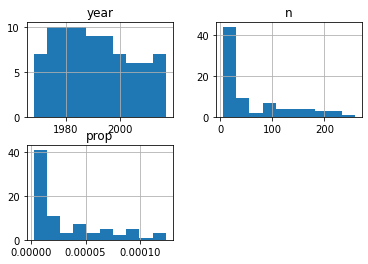

In [20]:
# Visualize name's popularity over time
B_year.hist()

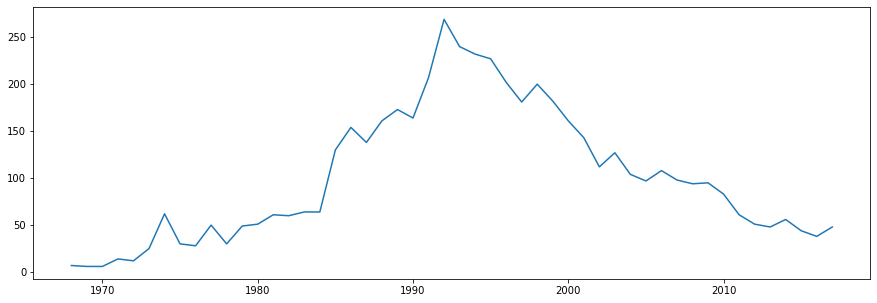

In [38]:
plt.figure(figsize=(15,5))
B_year = B_year.groupby('year').n.sum()
plt.plot(B_year.index, B_year.values)
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

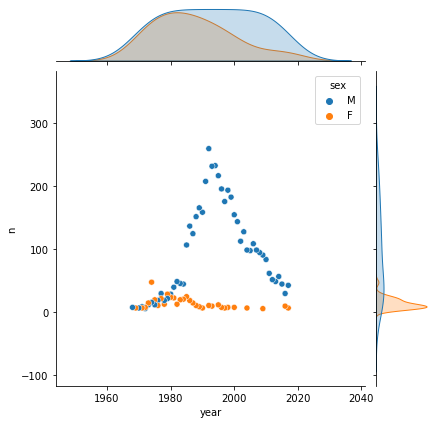

In [24]:
sns.jointplot(x='year', y='n', data=B_year, hue='sex')